Importing required libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [101]:
dataset= pd.read_csv("student_scores.csv")

First 5 rows of the dataset

In [102]:
dataset.head()

,Hours,Scores
0,2.50,21
1,5.10,47
2,3.20,27
3,8.50,75
4,3.50,30


Information about the dataset

In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Visualizing the dataset

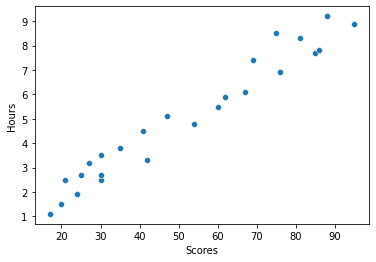

In [104]:
sns.scatterplot(x="Scores", y="Hours", data= dataset )
plt.show()

Storing the independent feature and the dependent feature in X and y

In [105]:
X= dataset.iloc[:,0].values
y= dataset.iloc[:,1].values

Splitting the dataset into training set and test set

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Implementing LassoLars linear model

In [107]:
from sklearn import linear_model
regressor = linear_model.LassoLars(alpha=0.01)
X_train= X_train.reshape(-1,1)
regressor.fit(X_train, y_train, None)

LassoLars(alpha=0.01, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
          positive=False, precompute='auto', verbose=False)

Predicting the results

In [108]:
X_test= X_test.reshape(-1,1)
y_pred= regressor.predict(X_test)

Accuracy of the model

In [109]:
regressor.score(X_train, y_train, sample_weight=None)

0.9637816662812314

In [110]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[10.05 17.  ]
 [33.02 42.  ]
 [18.4  24.  ]
 [87.32 75.  ]
 [48.69 54.  ]]


Predicted score that a student may achieve after studying for 9.25 hours

In [111]:
regressor.predict([[9.25]])

array([95.15])

Visualizing the results

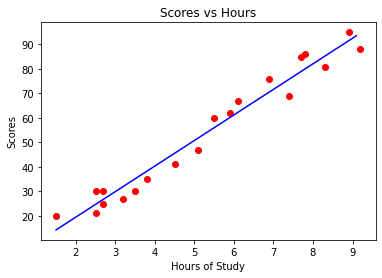

In [112]:
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Scores vs Hours')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.show()